# List Full Names of all the participants in your team below:

1. Balaji Arumugam
2. Xingyu Chen  
3. Heman Kurmar Das
4. Mohan Vellayan
5. Nicholas Anzalone
6. Ousman Kaba
7. Rishabh Kumar
8. Sagarika Thimmanayakanapalya
9. Aaron Liang
10.
11. 
12. 

Hello Machine Learning Engineer Jokang Team, 

You have been given a data which is obtained from **House Prices** in Buffalo, City. 

Number of Instances: 414 <br>
Number of Attributes: 5 (including the target variable `y`)

Attribute Information: 
  * **y**: Value of the house of unit area in $
  * **f1**: the house age (unit: year)
  * **f2**: the distance to the nearest MRT station (unit: meter)
  * **f3**: the number of convenience stores in the living circle on foot (integer)
  * **f4**: the geographic coordinate, latitude. (unit: degree)
  * **f5**: the geographic coordinate, longitude. (unit: degree)


There are no missing Attribute Values.

Based on the features mentioned above, your task is to build a **Basis Function based Liner Regression Model** to predict the house price in Buffalo

# Closed Form Solution with Basis Functions
The **genesis equation** for Linear Regression with Gaussian Radial Basis Function is of the form:

$y(x,w) = \phi(x).W$  

* $y(x,w)$ is predicted output,
* $\phi(x)$ is the Design Matrix
* $W = (w_{1}, ... w_{M})$ are the parameters to be learned from training samples

### Design Matrix
Each gaussian radial basis function $\phi_{j}$ converts the input instance to a value as shown below: <br>

$\phi_{j}(x) = \exp(-\frac{1}{2}(x - \mu_{j})^{T}\sum_{j}^{-1}(x - \mu_{j}))$

* $x$ is the input scaled dataset <br>
* $\mu_{j}$ is the center of the $j_{th}$ Guassian Radial Basis Function <br>
* $\sum_{j}$ decides how braodly the $j_{th}$ basis function spreads (Diagonal Covariance Matrix)

Repeated application of $j$ basis functions results in a Design Matrix as shown below:
![!picture](https://drive.google.com/uc?export=view&id=1j1kxv6nUPPECacd-_bDg_lL1yTJS5BwA)

For finding parameters $W$ for the above genesis using the **closed form solution** we pre-multiply by $\phi^{-1}(x)$ on LHS and RHS. We get,

$W = \phi^{-1}(x)Y$

But $\phi(x)$ is NOT A SQUARE MATRIX of FULL RANK! Hence, $\phi^{-1}(x)$ is intractable.

We therefore use the Moore-Penrose pseudo inverse as a generalization of the matrix inverse when the matrix may not be invertible. Hence, the final closed form solution for finding parameters $W$ with linear regression least squares solution is as follows:

$W = (\phi^{T}\phi)^{-1}\phi^{T}Y$

YOU NEED TO IMPLEMENT ABOVE EQUATION for finding $W$. 

<font color="red"> YOU CANNOT USE NUMPY linalg **pinv** https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html </font>

<font color="red">DO NOT USE SKLEARNS LINEAR REGRESSION LIBRARY DIRECTLY.</font>

<font color="green">YOU CAN USE np.linalg.inv, and np.dot FOR IMPLEMENTING PSEUDO-INVERSE</font>


### **Question:** In the following code cell implement the following:
* Step 1: Import the dataset (HousePriceBuffalo.csv) using Pandas Dataframe (Step 1 Implemented already)
* Step 2: Partition your dataset into training testing and validation using sklearns train_test_split library and split the features and target labels into seperate variables (Step 2 Implemented already)
* Step 3: Scale the features using sklearns min max scaling function (Step 3 Implemented already)
* Step 4: Convert Scaled Features and Labels into numpy arrays with dimensions required by closed form solution (Step 4 Implemented already)
* Step 5: Find the Mean ($\mu_{j}$) and Spread ($\sum_{j}$) for **3 basis functions** (Step 5 Implemented Already)
* Step 6: Create a Design Matrix using the scaled features, Mean ($\mu_{j}$) and Spread ($\sum_{j}$)
* Step 7: Train using Linear Regression algorithm with a Closed Form Solution **Hint: Use Pseudo Inverse Formula**
* Step 8: Test using Testing Dataset (Make sure you create a design matrix for Testing dataset using same Mean ($\mu_{j}$) and Spread ($\sum_{j}$) from Step 5)
* Step 9: Calculate Root Mean Squared Error (Erms) for Test Dataset
    * $Erms = \sqrt{\frac{1}{n}\sum_{i=0}^{i=n} (y\_test_{i} - y\_test\_pred_{i})^{2}}$ 

In [2]:
# Step 1 already implemented
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/Mihir2/BreakoutSessionDataset/master/HousePriceBuffalo.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))
data

# Step 2 already implemented
import numpy as np
from sklearn.model_selection import train_test_split
output = data['y']
input = data.to_numpy()[:,1:]
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.2)

# Step 3 already implemented
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_xtrain = scaler.fit_transform(x_train)
sc_xtest = scaler.transform(x_test)

# Step 4 already implemented
y_train_arr = y_train.to_numpy().reshape(y_train.shape[0],1)
x_train_arr = sc_xtrain
y_test_arr  = y_test.to_numpy().reshape(y_test.shape[0],1)
x_test_arr  = sc_xtest


# Step 5 already implemented
from  sklearn.cluster import MiniBatchKMeans
number_of_basis_function = 3
model = MiniBatchKMeans(n_clusters=number_of_basis_function)
distances = model.fit_transform(x_train_arr)
basis_means = model.cluster_centers_
basis_variances = np.zeros(number_of_basis_function)
i = 0
for label in model.labels_:
  basis_variances[label] = basis_variances[label] + (distances[i][label]**2)
  i = i + 1
for j in range(0,number_of_basis_function):
  basis_variances[j] = basis_variances[j]/np.count_nonzero(model.labels_ == j)
basis_variances = np.diag(basis_variances)
print(basis_means.shape)
print(basis_variances.shape)

(3, 5)
(3, 3)


## TA Response:

In [3]:
# Step 6
x_mu = np.zeros((number_of_basis_function,x_train_arr.shape[0]))
for i in range(0,number_of_basis_function):
  x_mu[i] = np.sum((x_train_arr - basis_means[i]),axis=1)

train_design_mat = np.exp(-0.5*np.multiply(np.dot(x_mu.T,np.linalg.inv(basis_variances)),x_mu.T))

# Step 7 
weights = np.dot(np.dot(np.linalg.inv(np.dot(train_design_mat.T,train_design_mat)),train_design_mat.T),y_train_arr)

# Step 8
x_mu = np.zeros((number_of_basis_function,x_test_arr.shape[0]))
for i in range(0,number_of_basis_function):
  x_mu[i] = np.sum((x_test_arr - basis_means[i]),axis=1)

test_design_mat = np.exp(-0.5*np.multiply(np.dot(x_mu.T,np.linalg.inv(basis_variances)),x_mu.T))
y_test_pred = np.dot(test_design_mat, weights)

#Step 9
Erms = np.sqrt(np.sum((y_test_pred - y_test_arr)**2)/y_test_arr.shape[0])
print(Erms)

13.364412002269852


## Student Answer:

In [7]:
# Step 6 


# Step 7 
basis_variances_inv = np.linalg.inv(basis_variances)
x_train_transformed = np.zeros((x_train_arr.shape[0], basis_variances.shape[0]))
for ix, row in enumerate(x_train_arr):
  temp_arr = np.zeros(basis_variances.shape[0])
  for i in range(3):
    inp = np.expand_dims(row,1) - np.expand_dims(basis_means[i], 1)
    temp_arr[i] = np.exp(-0.5 * np.dot((inp.T * basis_variances_inv[i,i]), inp))
  x_train_transformed[ix] = temp_arr
print(x_train_transformed.shape)

basis_variances_inv = np.linalg.inv(basis_variances)
x_test_transformed = np.zeros((x_test_arr.shape[0], basis_variances.shape[0]))
for ix, row in enumerate(x_test_arr):
  temp_arr = np.zeros(basis_variances.shape[0])
  for i in range(3):
    inp = np.expand_dims(row,1) - np.expand_dims(basis_means[i], 1)
    temp_arr[i] = np.exp(-0.5 * np.dot((inp.T * basis_variances_inv[i,i]), inp))
  x_test_transformed[ix] = temp_arr
print(x_test_transformed.shape)

# Step 8 
W = np.dot(np.linalg.inv(np.dot(x_train_transformed.T, x_train_transformed)), np.dot(x_train_transformed.T,y_train_arr))
Y_test = np.dot(x_test_transformed, W)

# Step 9 
err = y_test_arr - Y_test
rms = np.sqrt(np.mean(err**2))

(331, 3)
(83, 3)


In [ ]:
print(x_train_arr.shape, y_train_arr.shape, x_test_arr.shape, y_test_arr.shape)
print(basis_variances.shape)
print(basis_means)
print(temp_arr.shape)

(331, 5) (331, 1) (83, 5) (83, 1)
(3, 3)
[[0.3894484  0.31066376 0.12299652 0.34968367 0.54285381]
 [0.21680412 0.05245264 0.61360719 0.50712636 0.73288388]
 [0.77124777 0.05433914 0.65913043 0.50897784 0.72164349]]
(3,)


ϕj(x)=exp(−12(x−μj)T∑−1j(x−μj))

In [ ]:
basis_variances_inv = np.linalg.inv(basis_variances)
x_train_transformed = np.zeros((x_train_arr.shape[0], basis_variances.shape[0]))
for ix, row in enumerate(x_train_arr):
  temp_arr = np.zeros(basis_variances.shape[0])
  for i in range(3):
    inp = np.expand_dims(row,1) - np.expand_dims(basis_means[i], 1)
    temp_arr[i] = np.exp(-0.5 * np.dot((inp.T * basis_variances_inv[i,i]), inp))
  x_train_transformed[ix] = temp_arr
print(x_train_transformed.shape)

(331, 3)


In [ ]:
basis_variances_inv = np.linalg.inv(basis_variances)
x_test_transformed = np.zeros((x_test_arr.shape[0], basis_variances.shape[0]))
for ix, row in enumerate(x_test_arr):
  temp_arr = np.zeros(basis_variances.shape[0])
  for i in range(3):
    inp = np.expand_dims(row,1) - np.expand_dims(basis_means[i], 1)
    temp_arr[i] = np.exp(-0.5 * np.dot((inp.T * basis_variances_inv[i,i]), inp))
  x_test_transformed[ix] = temp_arr
print(x_test_transformed.shape)

(83, 3)


W=(ϕTϕ)−1ϕTY

In [ ]:
W = np.dot(np.linalg.inv(np.dot(x_train_transformed.T, x_train_transformed)), np.dot(x_train_transformed.T,y_train_arr))

In [ ]:
print(W.shape)

(3, 1)


In [ ]:
Y_test = np.dot(x_test_transformed, W)
print(Y_test.shape)

(83, 1)


In [ ]:
err = y_test_arr - Y_test
rms = np.sqrt(np.mean(err**2))
print(rms)
print(y_test_arr)

17.218897721930794
[[ 53.3]
 [ 27.7]
 [ 42.2]
 [ 32.9]
 [ 48.2]
 [ 47.1]
 [ 40.8]
 [ 34.7]
 [ 35.3]
 [ 48.5]
 [ 31.7]
 [ 28.9]
 [ 21.5]
 [ 23.2]
 [ 29.3]
 [ 43.5]
 [ 23.8]
 [ 62.9]
 [ 51.6]
 [ 49.3]
 [ 42.3]
 [ 42.3]
 [ 51.7]
 [ 15.4]
 [ 62.2]
 [ 31.1]
 [ 52.2]
 [ 25.6]
 [ 34.6]
 [ 55. ]
 [ 16.7]
 [ 63.9]
 [ 22.9]
 [ 18.6]
 [ 15.5]
 [ 27.3]
 [ 29.3]
 [ 20.7]
 [ 31.3]
 [ 25.7]
 [ 38.2]
 [ 49.3]
 [ 32.2]
 [ 24.8]
 [ 39.4]
 [ 41.5]
 [ 13.2]
 [ 53.5]
 [ 38.5]
 [ 45.7]
 [ 63.3]
 [ 33.4]
 [ 58.1]
 [ 36.7]
 [ 24.4]
 [ 38.4]
 [ 47. ]
 [ 27. ]
 [ 49.5]
 [ 51. ]
 [ 23.6]
 [ 46.6]
 [ 39.5]
 [ 48.1]
 [ 34.6]
 [ 42.5]
 [ 43.1]
 [ 20. ]
 [ 42.5]
 [117.5]
 [ 30.7]
 [ 45.4]
 [ 41.4]
 [ 15. ]
 [ 15.6]
 [ 56.8]
 [ 26.5]
 [ 26.9]
 [ 40.6]
 [ 40.3]
 [ 52.2]
 [ 28.4]
 [ 36.2]]


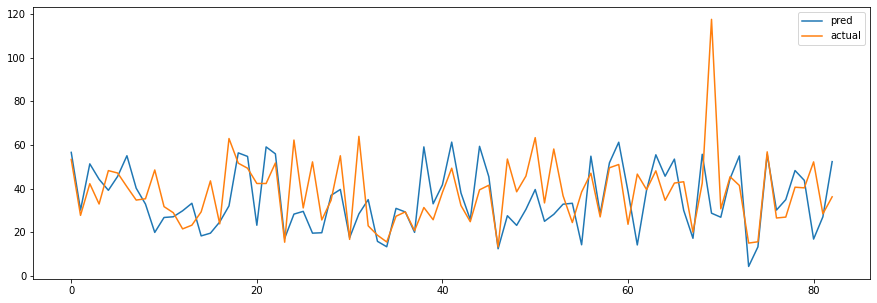

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(Y_test, label='pred')
plt.plot(y_test_arr, label='actual')
plt.legend() 